Populating the interactive namespace from numpy and matplotlib
Shape of the image (87102,)


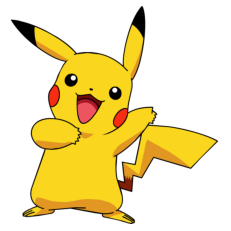

Shape of the image (568976,)


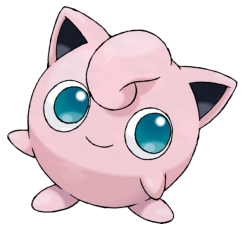

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_pikachu = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/pikachu.png?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_rondoudou = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/rondoudou.png?raw=true'
resp = requests.get(url_rondoudou, stream=True).raw
image_array_rondoudou = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_rondoudou.shape}')
image_rondoudou = cv2.imdecode(image_array_rondoudou, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  000  255  255  255  255  255  255  255  255  255  255  

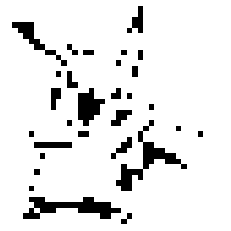

In [ ]:
res = cv2.resize(image_pikachu , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
#
# 

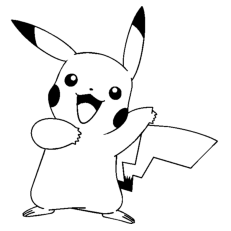

In [ ]:
#Convert to bw
img_bw = cv2.imdecode(image_array_pikachu, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


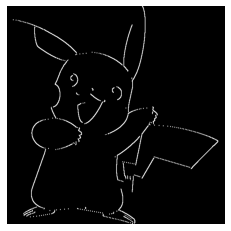

In [ ]:
#defining a vertical edge detection kernel 
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


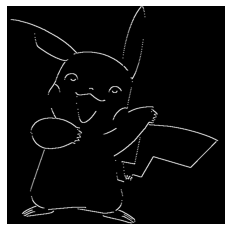

In [ ]:
#defining an horizontal edge detection kernel 
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [ ]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

42565632/42552061 [==============================] - 0s 0us/step
/content/datasets/dataset
/content/datasets/dataset


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

174


In [ ]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 174 files belonging to 2 classes.
Using 140 files for training.
Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


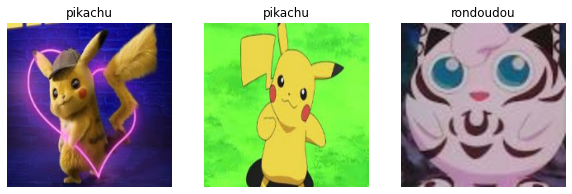

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 47s 974ms/step - loss: 0.6274 - accuracy: 0.7357 - val_loss: 0.4504 - val_accuracy: 0.8235
Epoch 2/2
47/47 [==============================] - 45s 964ms/step - loss: 0.2912 - accuracy: 0.9071 - val_loss: 0.3816 - val_accuracy: 0.9412


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

Saving download (5).jpg to download (5) (5).jpg


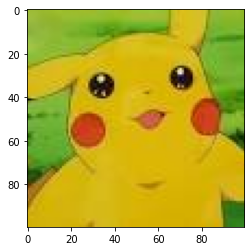

[1]
[[0.17291282 0.8270872 ]]


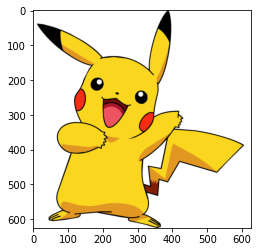

IT'S A PIKACHU !


In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    #predictions = (model.predict(x_test) > 0.5).astype("int32")
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    print(np.argmax(model.predict(img_to_predict), axis=-1))
    print(model.predict(img_to_predict))
    if res == 1:
        plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A PIKACHU !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A RONDOUDOU !")
